In [2]:
import os
import sys
import numpy as np
import re
import pandas as pd
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import pickle
from torch.nn.utils.rnn import pad_sequence
from unicodedata import normalize
from keras.preprocessing.text import Tokenizer
import keras
from torchvision import transforms, datasets
from tqdm import tqdm
from time import sleep
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import pylab as pl
import matplotlib.pyplot as plt
import textclassification as tc
from sklearn.metrics import precision_recall_fscore_support

In [1]:
ordem_classes_antigo = ['área_eletricamente_inativa',
       'Bloqueio_de_ramo_direito', 'Bloqueio_de_ramo_esquerdo',
       'Bloqueio_de_ramo_direito_e_bloqueio_divisional_anterossuperior_do_ramo_esquerdo',
       'Bloqueio_intraventricular_inespecífico',
       'Sobrecarga_ventricular_esquerda_(critérios_de_Romhilt-Estes)',
       'Sobrecarga_ventricular_esquerda_(critérios_de_voltagem)',
       'Fibrilação_atrial', 'Flutter_atrial',
       'Bloqueio_atrioventricular_de_2°_grau_Mobitz_I',
       'Bloqueio_atrioventricular_de_2°_grau_Mobitz_II',
       'Bloqueio_atrioventricular_2:1', 'Bloqueio_atrioventricular_avançado',
       'Bloqueio_atrioventricular_total',
       'Pré-excitação_ventricular_tipo_Wolff-Parkinson-White',
       'Sistema_de_estimulação_cardíaca_normofuncionante',
       'Sistema_de_estimulação_cardíaca_com_disfunção',
       'Taquicardia_atrial_multifocal', 'Taquicardia_atrial',
       'Taquicardia_supraventricular', 'Corrente_de_lesão_subendocárdica',
       'Alterações_primárias_da_repolarização_ventricular',
       'Extrassístoles_supraventriculares', 'Extrassístoles_ventriculares',
       'Bradicardia_sinusal',
       'ECG_dentro_dos_limites_da_normalidade_para_idade_e_sexo',
       'Alterações_da_repolarização_ventricular_atribuídas_à_ação_digitálica',
       'Alterações_inespecíficas_da_repolarização_ventricular',
       'Alterações_secundárias_da_repolarização_ventricular',
       'Arritmia_sinusal',
       'Ausência_de_sinal_eletrocardiográfico_que_impede_a_análise',
       'Interferência_na_linha_de_base_que_não_impede_a_análise_do_ECG',
       'Ausência_de_sinal_eletrocardiográfico_que_não_impede_a_análise',
       'Traçado_com_qualidade_técnica_insuficiente',
       'Possível_inversão_de_posicionamento_de_eletrodos',
       'Baixa_voltagem_em_derivações_precordiais',
       'Baixa_voltagem_em_derivações_periféricas',
       'Bloqueio_atrioventricular_de_1°_grau',
       'Bloqueio_de_ramo_direito_e_bloqueio_divisional_posteroinferior_do_ramo_esquerdo',
       'Bloqueio_divisional_anterossuperior_do_ramo_esquerdo',
       'Bloqueio_divisional_posteroinferior_do_ramo_esquerdo',
       'Desvio_do_eixo_do_QRS_para_direita',
       'Desvio_do_eixo_do_QRS_para_esquerda',
       'Dissociação_atrioventricular_isorrítmica',
       'Distúrbio_de_condução_do_ramo_direito',
       'Distúrbio_de_condução_do_ramo_esquerdo', 'Intervalo_PR_curto',
       'Intervalo_QT_prolongado', 'Isquemia_subendocárdica',
       'Progressão_lenta_de_R_nas_derivações_precordiais', 'Pausa_sinusal',
       'Corrente_de_lesão_subepicárdica',
       'Corrente_de_lesão_subepicárdica_-_provável_infarto_agudo_do_miocárdio_com_supradesnivelamento_de_ST',
       'Repolarização_precoce', 'Ritmo_atrial_ectópico',
       'Ritmo_atrial_multifocal', 'Ritmo_idioventricular_acelerado',
       'Ritmo_juncional', 'Síndrome_de_Brugada', 'Sobrecarga_atrial_direita',
       'Sobrecarga_atrial_esquerda', 'Sobrecarga_biatrial',
       'Sobrecarga_biventricular', 'Sobrecarga_ventricular_direita',
       'Sobrecarga_ventricular_esquerda(_critérios_de_voltagem)',
       'Taquicardia_sinusal', 'Taquicardia_ventricular_não_sustentada',
       'Taquicardia_ventricular_sustentada',
       'Suspeita_de_Síndrome_de_Brugada_repetir_V1-V2_em_derivações_superiores',
       'Taquicardia_juncional', 'Batimento_de_escape_atrial',
       'Batimento_de_escape_supraventricular', 'Batimento_de_escape_juncional',
       'Batimento_de_escape_ventricular']

ordem_classes = ['área_eletricamente_inativa',
 'Bloqueio_de_ramo_direito',
 'Bloqueio_de_ramo_esquerdo',
 'Sobrecarga_ventricular_esquerda_(critérios_de_Romhilt-Estes)',
 'Fibrilação_atrial',
 'Flutter_atrial',
 'Bloqueio_atrioventricular_de_2°_grau_Mobitz_I',
 'Pré-excitação_ventricular_tipo_Wolff-Parkinson-White',
 'Sistema_de_estimulação_cardíaca_normofuncionante',
 'Taquicardia_atrial_multifocal',
 'Taquicardia_supraventricular',
 'Alterações_primárias_da_repolarização_ventricular',
 'Extrassístoles_supraventriculares',
 'Extrassístoles_ventriculares',
 'Bradicardia_sinusal',
 'ECG_dentro_dos_limites_da_normalidade_para_idade_e_sexo',
 'Alterações_inespecíficas_da_repolarização_ventricular',
 'Alterações_secundárias_da_repolarização_ventricular',
 'Arritmia_sinusal',
 'Ausência_de_sinal_eletrocardiográfico_que_impede_a_análise',
 'Possível_inversão_de_posicionamento_de_eletrodos',
 'Bloqueio_atrioventricular_de_1°_grau',
 'Bloqueio_divisional_anterossuperior_do_ramo_esquerdo',
 'Bloqueio_divisional_posteroinferior_do_ramo_esquerdo',
 'Desvio_do_eixo_do_QRS_para_direita',
 'Desvio_do_eixo_do_QRS_para_esquerda',
 'Distúrbio_de_condução_do_ramo_direito',
 'Distúrbio_de_condução_do_ramo_esquerdo',
 'Intervalo_PR_curto',
 'Intervalo_QT_prolongado',
 'Isquemia_subendocárdica',
 'Progressão_lenta_de_R_nas_derivações_precordiais',
 'Ritmo_atrial_ectópico',
 'Sobrecarga_atrial_esquerda',
 'Taquicardia_sinusal']
ordem_classes_eng = ""

In [3]:
print("Loading Data...")
gold         = pd.read_csv("../light_data/gold_standard.csv")
labels       = np.load("../light_data/gold_labels.npy")
valid        = np.load("../light_data/new_classes.npy")[:,1]

Loading Data...


In [4]:
#ids_achados   = pd.read_csv('../../greenZoneIds.csv', index_col = 0)
#resultLabels   = pd.read_csv('../../../data/resultLabels.csv')
#baseC = pd.read_csv("../../../data/DATA_LAUDOS_TEXTO_formato1", sep = ";")

In [4]:
with open("output/25_Jul_2020/parameters", 'r') as f:
    params = f.read().split("\n")
seq_size, TOP_WORDS = [int(a) for a in params]

In [5]:
print("Detecting device...")
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on a GPU :D")
else:
    device = torch.device("cpu")
    print("Running on a CPU :/")

Detecting device...
Running on a CPU :/


In [7]:
with open("output/25_Jul_2020/tokenizer_"+str(TOP_WORDS)+".pickle", 'rb') as handle:
    tokenizer = pickle.load(handle)

In [36]:
print("Preparing texts...")
text = [tc.clean_text(t) for t in text]
    
dicionario = {}
for row in dicio.itertuples():
    aux = []
    for diag in row:
        if type(diag) is str: aux.append(tc.clean_text(diag))
    dicionario[row[0]] = aux
    if(row[0] == 9): break

Preparing texts...


In [7]:
#Atribua aqui seu teste
texts = gold["texto"]

In [10]:
dicionarioCsv = pd.read_csv("../light_data/DicionarioECG_completo.csv", index_col = 0)

print("Preparing texts...")
texts = [tc.clean_text(text) for text in texts]
    
dicionario = {}
for row in dicionarioCsv.itertuples():
    aux = []
    for diag in row:
        if type(diag) is str: aux.append(tc.clean_text(diag))
    dicionario[row[0]] = aux

Preparing texts...


In [40]:
print("Calculating scores...\n")

def return_scores(text, dicionario):
    scores = [max([tc.make_score(text, diag) for diag in dicionario[i]]) for i in range(10)]
    return scores

batch = 100
for i in range(0, len(text), batch):
    #try:
#     scores = [return_scores(text, dicionario) for text in texts[i:i+batch]]
    scores = [return_scores(t, dicionario) for t in text[i:i+batch]]

    if(i == 0): result = np.array(scores)
    else: result = np.concatenate((result, np.array(scores)), axis = 0)
    print("BATCH!\n", i+batch,"/",len(text))
    print()
#     except:
#         print("ERROR!!!!!")
#         errors.append([i, i+batch])
#     errors = np.array(errors)
#     np.save("errors.npy", errors)
#         with open('../../data/resultados/scorings1.csv', 'a') as f:
#             for j in range(i,i+batch):
#                 f.write(str(db["ID_EXAME"][j]))
#                 f.write(',"')
#                 f.write(str(scores[j-i]))
#                 f.write('"\n')

Calculating scores...

BATCH!
 100 / 136

BATCH!
 200 / 136



In [43]:
print("Tokenizing test...")
text        = [tc.clean_text(i) for i in text]
test_X_temp = tokenizer.texts_to_sequences(text)
test_X_temp = [torch.Tensor(i).type(torch.LongTensor) for i in test_X_temp]
test_X_temp = pad_sequence(test_X_temp, batch_first=True).type(torch.LongTensor)

test_X = []
if(len(test_X_temp[0]) < seq_size):
    for i in range(len(test_X_temp)):
        line = test_X_temp[i]
        for j in range(seq_size - len(line)):
            line = torch.cat((line, torch.Tensor([0]).type(torch.LongTensor)), 0)
        test_X.append(line)
else:
    test_X = [line[:seq_size] for line in test_X_temp]
    
test_X = torch.stack([i for i in test_X])

Tokenizing test...


In [95]:
# import importlib
# importlib.reload(textclassification)

<module 'textclassification' from '/scratch/joao.pedrosa/text_classification/code/main/textclassification.py'>

In [46]:
net = tc.Net(seq_size, TOP_WORDS)
net.load_state_dict(torch.load("output/25_Jul_2020/network_model.pth",  map_location=device))
print(net.eval())

Building NN...
Net(
  (l1): Embedding(10000, 128, padding_idx=0)
  (l3): LSTM(128, 128, num_layers=2, dropout=0.2, bidirectional=True)
  (l4): Flatten(start_dim=1, end_dim=-1)
  (l5): Linear(in_features=105216, out_features=35, bias=True)
)


In [47]:
print("Passing test through the network...")
finalResult = torch.Tensor()
size = 64
for i in tqdm(range(0, test_X.size()[0], size)):
    with torch.no_grad():
        result      = net(test_X[i: min(i+size, test_X.size()[0])])
    finalResult = torch.cat((finalResult, result), 0)

  0%|          | 0/3 [00:00<?, ?it/s]

Passing test through the network...


100%|██████████| 3/3 [00:01<00:00,  2.35it/s]


In [53]:
len(finalResult[0])

35

In [48]:
y_test  = np.array(np.array([[int(row[i]) for i in range(len(row)) if valid[i]] for row in labels]))
y_score = np.array([[row[i] for i in range(len(row)) if valid[i]] for row in result])

NameError: name 'valid' is not defined

In [39]:
print("Calculating best candidates for threshold...")
n_class = 35
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
for i in range(n_class):
    fpr[i], tpr[i], thresholds[i] = metrics.roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

Calculating best candidates for threshold...


In [67]:
thresholds[0]

array([93.857, 92.857, 90.909, 87.5  , 85.714, 82.143, 77.778, 75.   ,
       71.429, 64.286, 63.636, 62.5  , 59.091, 58.333, 57.143, 56.25 ,
       55.556, 54.545, 52.381, 50.   , 47.619, 46.429, 45.455, 44.444,
       43.75 , 42.857, 41.667, 37.5  , 36.364, 35.714,  0.   ])

In [65]:
print("Calculating thresholds...")
#Calculate limits by maximizing F1
limits = []
for j in tqdm(range(n_class)):
    bigf1 = 0
    for threshold in thresholds[j]:
        y_bin = []
        for row in y_score[:,j]:
            if row > thresholds[i]:
                y_bin.append(1)
            else:
                y_bin.append(0)
        y_bin = np.array(y_bin)
        precision, _, f1, _ = precision_recall_fscore_support(y_test[:,j], y_bin, average = 'binary')
        
        if(f1 > bigf1 and precision > 0):
            bigf1 = f1
            maxi = threshold
    limits.append(maxi)

  0%|          | 0/35 [00:00<?, ?it/s]

Calculating thresholds...


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [47]:
from datetime import date

today = date.today()
date = today.strftime("%d_%b_%Y")
import os, sys
if not os.path.exists("results"):
    os.mkdir("results")
if not os.path.exists("results/"+date):
    os.mkdir("results/"+date)
# if not os.path.exists("results/"+date+"/ROC"):
#     os.mkdir("results/"+date+"/ROC")

In [49]:
limits = np.load("output/score_thresholds.npy")

In [61]:
limits

array([80.   , 88.   , 88.   , 90.   , 89.   , 80.   , 85.   , 80.   ,
       62.162, 90.   , 80.   , 90.   , 80.   , 80.   , 85.   , 80.   ,
       78.   , 85.   , 80.   , 75.   , 90.   , 78.   , 80.   , 82.   ,
       90.   , 90.   , 85.   , 82.   , 85.   , 70.   , 80.   , 80.   ,
       80.   , 85.   , 85.   ])

In [ ]:
threshold

In [57]:
print("Calculating results...")
#Function to turn score in binary
#Here the thresholds must be a list of 74 numbers
def getMetrics(y_test, y_score, thresholds):
    
    #First we turn into binary
    y_bin = []
    for j in range(len(y_score)):
        ans = []
        for i in range(n_class):
            if y_score[j][i] >= thresholds[i]:
#             if y_label[j][i]:
                ans.append(1)
            else:
                ans.append(0)
        y_bin.append(np.array(ans))
    y_bin = np.array(y_bin)
    
    #Then we calculate
    target_names = ["(" + ordem_classes[i] + ") Class" + str(i) for i in range(n_class)]
    precision = dict()
    recall = dict()
    f1 = dict()
    sup = dict()
    for i in range(n_class):
        precision[i], recall[i], f1[i], sup[i] = precision_recall_fscore_support(y_test[:,i], y_bin[:,i], average = 'binary')
    return precision, recall, f1, sup

#z = 0.1
#while(z < 1):
precision, recall, f1, _ = getMetrics(y_test, y_score, limits)
#   z += 0.1
f1 = sorted(f1.items(), key=lambda x: x[1], reverse=True)
df = pd.DataFrame(columns = ["Class", "Precision", "Recall", "F1", "Ocurrences"])
for row in f1:
    n = row[0]
    sup = y_test[:,n].sum()
    new_row = {'Class': str(ordem_classes[n]), 'Precision': precision[n], 'Recall': recall[n], 'F1': row[1], "Ocurrences": sup}
    df = df.append(new_row, ignore_index = True)
df = df.set_index("Class")
df.to_csv("results/"+date+"/resultLevAuto.csv")

Calculating results...


Plotting ROC curves...


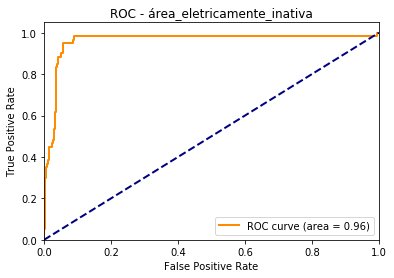

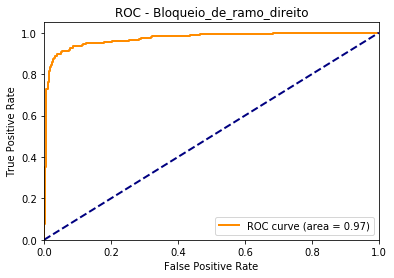

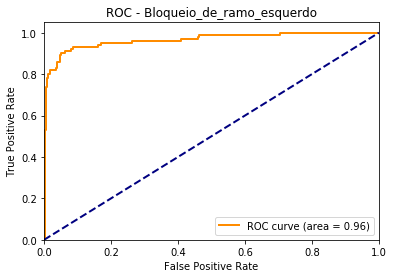

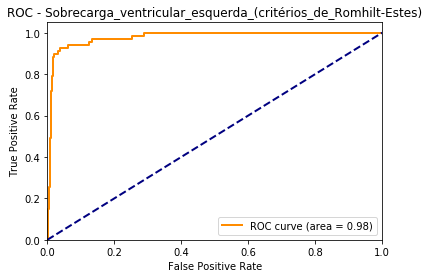

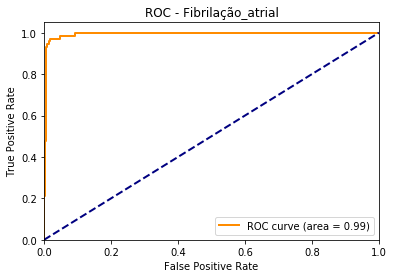

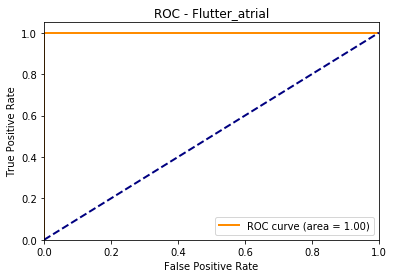

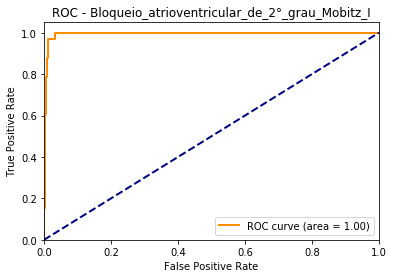

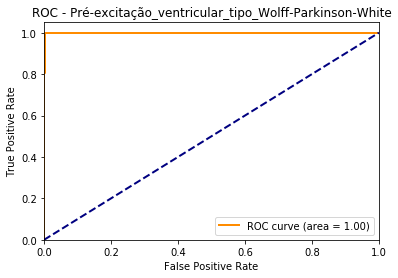

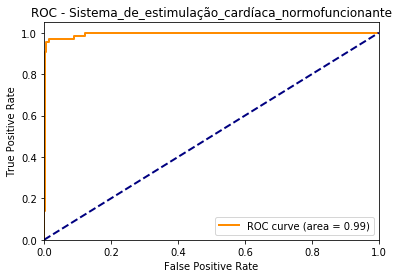

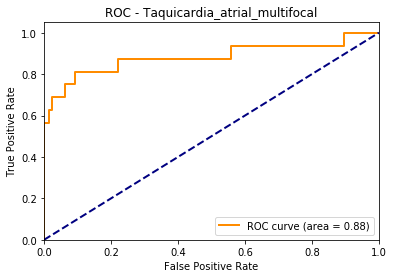

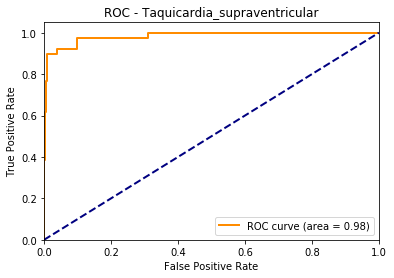

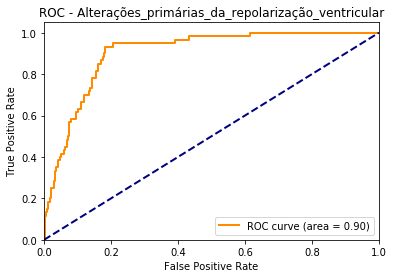

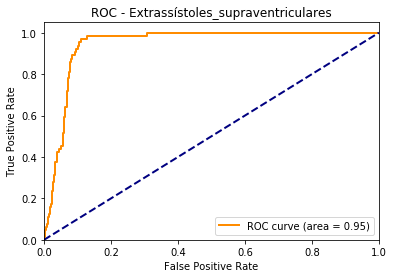

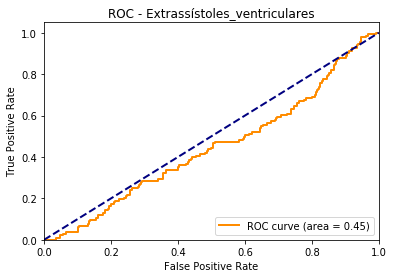

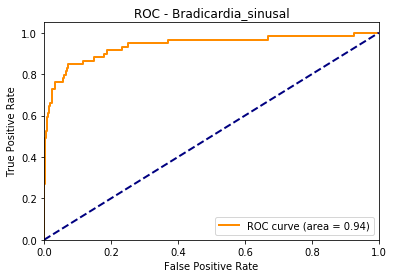

KeyboardInterrupt: 

In [133]:
print("Plotting ROC curves...")
for i in range(35):
    nClass = i
    plt.figure()
    lw = 2
    plt.plot(fpr[nClass], tpr[nClass], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[nClass])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC - ' + ordem_classes[nClass])
    plt.legend(loc="lower right")
    plt.savefig('results/'+date+'/ROC/' + ordem_classes[nClass] + '.png')
    plt.show()

In [ ]:
print("Completed!")